Notebook to compare global mean temperature at 2m from NextGEMS simulations (using Low Resolution Archive) with ERA5 eanalysis data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aqua import Reader, catalogue
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y
IFS	tco25

Explore ERA5 dataset (used as reference). N.B. set fix=False to use fldmean method later.

In [5]:
reader = Reader(model='ERA5',exp='era5',source="monthly")
data = reader.retrieve(fix=False)
data

<xarray.Dataset>
Dimensions:  (time: 996, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 1e+03 5e+03 1e+04 2.5e+04 5e+04 7e+04 8.5e+04 1e+05
Data variables:
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    Q        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    SLHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    T        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    T2M      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TCC      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    U        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    V        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

Example of dataset of Low Resolution Archive available for ICON

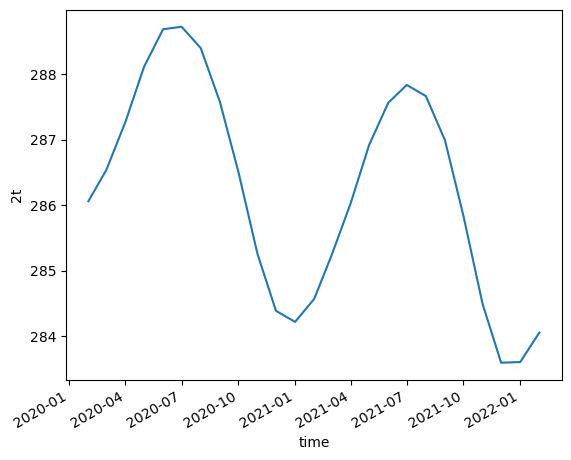

In [14]:
reader = Reader(model="ICON",exp="ngc2009",source="lra-r100-monthly")
data = reader.retrieve()
reader.fldmean(data["2t"]).plot()

Plot of global mean temperature

2023-05-29 17:56:56 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly
2023-05-29 17:57:00 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly
2023-05-29 17:57:01 :: Reader :: WARNING  -> Source grid: None
2023-05-29 17:57:04 :: Reader :: WARNING  -> Source areas file not found: /work/bb1153/b382075/nextgems/weights/cell_area_IFS_tco1279-orca025-cycle3_lra-r100-monthly.nc
2023-05-29 17:57:04 :: Reader :: WARNING  -> Attempting to generate it ...
2023-05-29 17:57:05 :: Reader :: WARNING  -> Success!


Text(0.5, 1.0, 'global mean temperature at 2m')

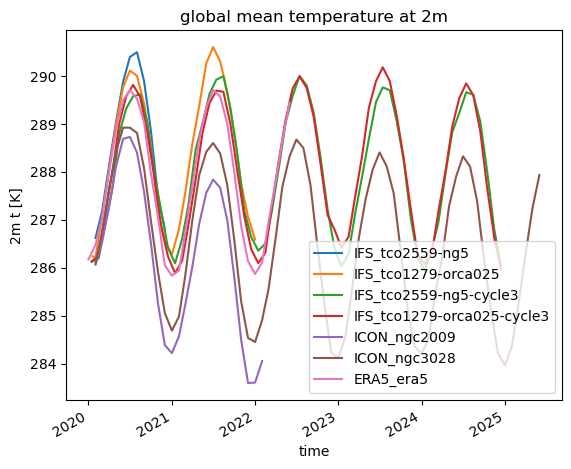

In [5]:
model_list = ["IFS", "ICON", "ERA5"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025", "tco2559-ng5-cycle3", "tco1279-orca025-cycle3"], "ICON": ["ngc2009", "ngc3028"], "ERA5": ["era5"]} 
source = {"IFS": ["lra-r100-monthly"], "ICON": ["lra-r100-monthly"], "ERA5": ["monthly"]}

data = {}
for model in model_list:
    for exp in exp_name[model]:
        for src in source[model]:
            if model=="ERA5":
                reader = Reader(model=model, exp=exp, source=src)
                data[(model, exp)] = reader.retrieve(fix=False)["T2M"].isel(time=range(-36,-6))
                data[(model, exp)]=reader.fldmean(data[(model, exp)])
            else:
                reader = Reader(model=model, exp=exp, source=src)
                data[(model, exp)] = reader.retrieve()["2t"]
                data[(model, exp)]=reader.fldmean(data[(model, exp)])
plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        data[(model, exp)].plot(label=f"{model}_{exp}")
plt.legend(fontsize=10)
plt.ylabel("2m t [K]")
plt.title("global mean temperature at 2m")